In [3]:
#calcule
import pandas as pd
import numpy as np

#visualisation
import seaborn as sns
import matplotlib.pyplot as plt

#nettoyage
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest , f_classif #test anova +classification
from sklearn.model_selection import train_test_split

#Evaluation
from sklearn.metrics import f1_score, confusion_matrix, classification_report
#f1: donne un bonne aperçu du rapport de la precision et de la sensibilité( proportion d'erreur type 1 et type erreur 2)
#confusion_matrix: sert a voir les rapport faux positif/faux negatif
#classification_report:donne un bilan global
from sklearn.model_selection import learning_curve
#Utile afin de voir si le modèle et sur ajuster ou sous ajuster




#prediction
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
house_data= pd.read_csv("C:/Users/ranus/AdvancedHousePrice/AdvancedHousePrice/train.csv")
data_test= pd.read_csv("C:/Users/ranus/AdvancedHousePrice/AdvancedHousePrice/test.csv")
pd.set_option('display.max_row',1459)
data_test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [4]:
house_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


# Analyse de données

Commençons par analyser les données pour avoir une meilleur compréhension de nos données.

## Checklist

### Analyse de forme:
- **target** :SalePrice
- **nombre de ligne et de colonne** : 1460, 81
- **variable** : 38 quantitative , 43 qualitative
- **valeur manquante** : beaucoup de NAN sur certaine valeurs on distingue  également 2 groupes de variable avec des valeurs manquantes qui se distinguent

### Analyse en fond:
- ** ** : 
- ** ** :
- ** ** :
- ** ** :

## Analyse de Forme

In [5]:
df=house_data.copy()
df.shape

(1460, 81)

In [6]:
df.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

<AxesSubplot:>

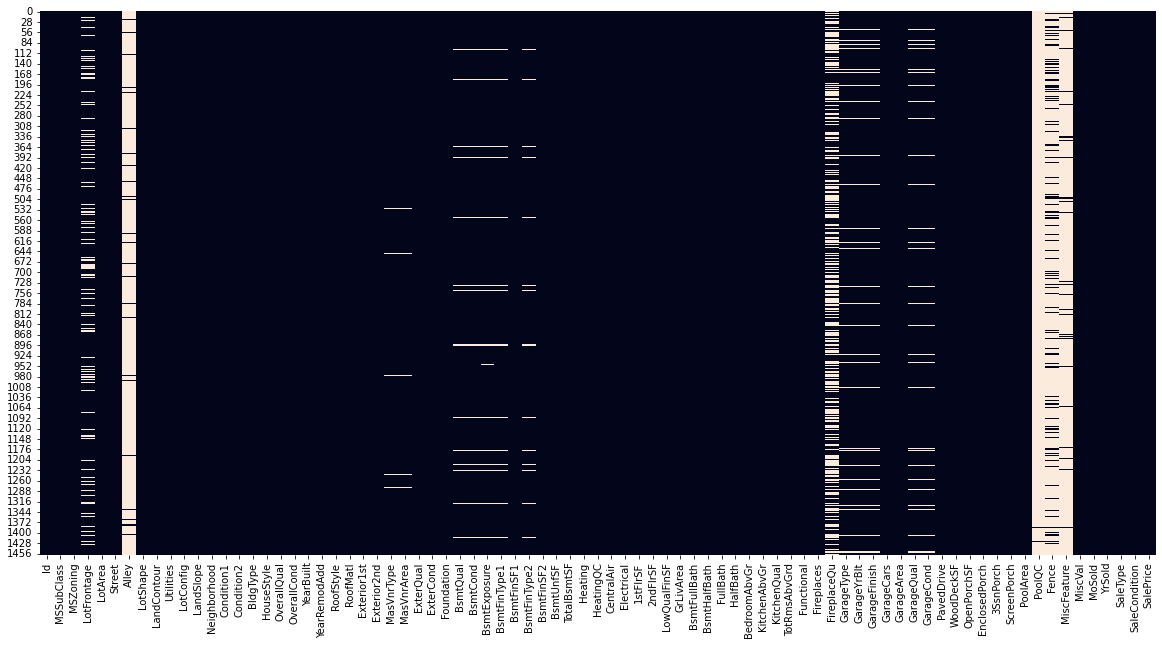

In [7]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(),cbar=False)


In [8]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=False)

PoolQC           0.995205
MiscFeature      0.963014
Alley            0.937671
Fence            0.807534
FireplaceQu      0.472603
LotFrontage      0.177397
GarageYrBlt      0.055479
GarageCond       0.055479
GarageType       0.055479
GarageFinish     0.055479
GarageQual       0.055479
BsmtFinType2     0.026027
BsmtExposure     0.026027
BsmtQual         0.025342
BsmtCond         0.025342
BsmtFinType1     0.025342
MasVnrArea       0.005479
MasVnrType       0.005479
Electrical       0.000685
Id               0.000000
Functional       0.000000
Fireplaces       0.000000
KitchenQual      0.000000
KitchenAbvGr     0.000000
BedroomAbvGr     0.000000
HalfBath         0.000000
FullBath         0.000000
BsmtHalfBath     0.000000
TotRmsAbvGrd     0.000000
GarageCars       0.000000
GrLivArea        0.000000
GarageArea       0.000000
PavedDrive       0.000000
WoodDeckSF       0.000000
OpenPorchSF      0.000000
EnclosedPorch    0.000000
3SsnPorch        0.000000
ScreenPorch      0.000000
PoolArea    

Nous pouvons éliminer les variable qui ont plus de 90% de données manquantes.

In [9]:
df=df[df.columns[df.isna().sum()/df.shape[0]<0.9]]
df.shape

(1460, 78)

### Examen de la colonne cible


<AxesSubplot:>

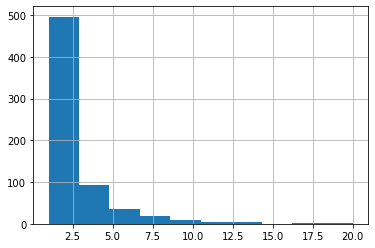

In [10]:
target=df['SalePrice']
target.value_counts(normalize=True)#normalize permet d'avoir des pourcentages 
target.value_counts().hist()

### Histogramme des variables continues

C:\Users\ranus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ranus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ranus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

C:\Users\ranus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ranus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ranus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

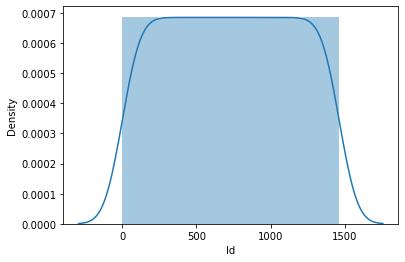

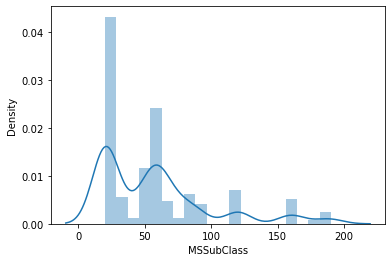

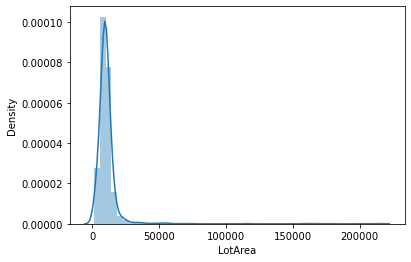

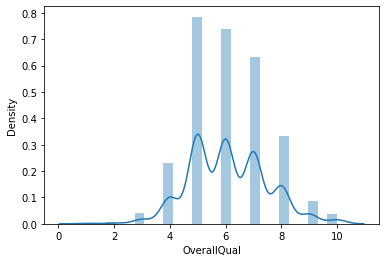

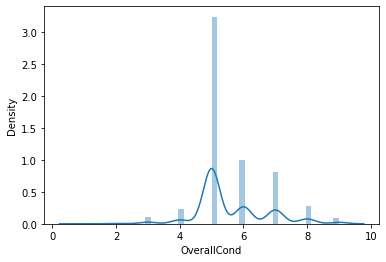

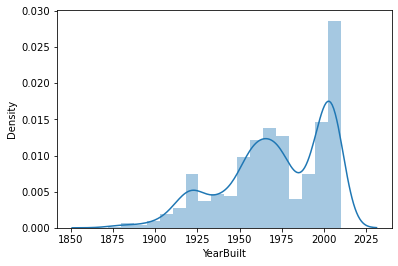

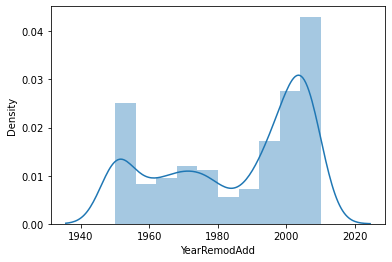

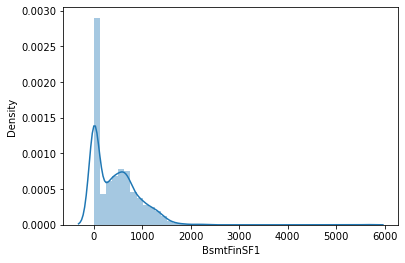

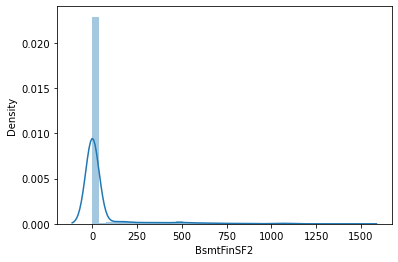

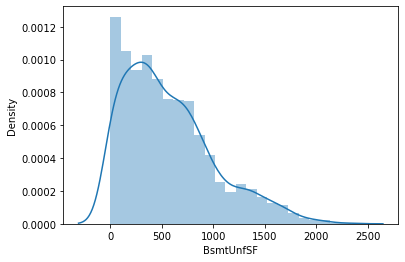

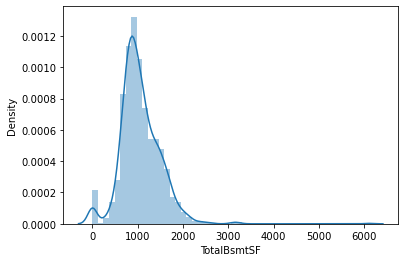

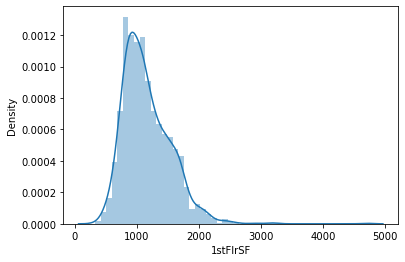

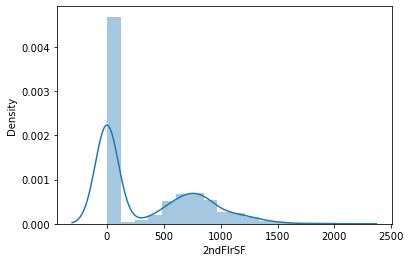

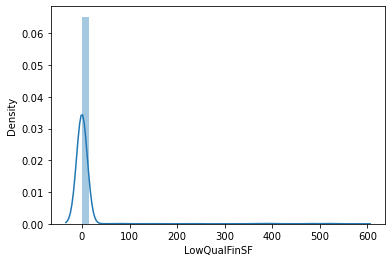

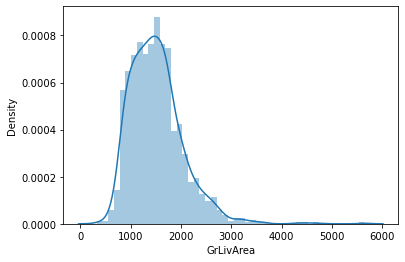

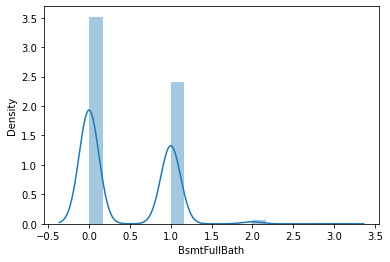

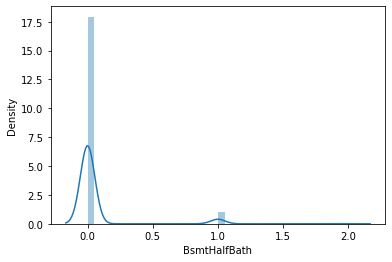

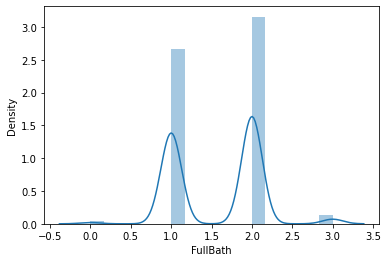

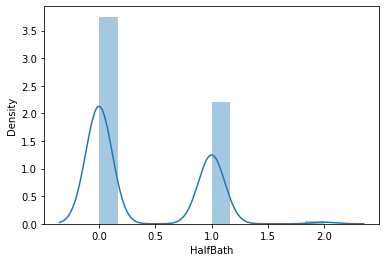

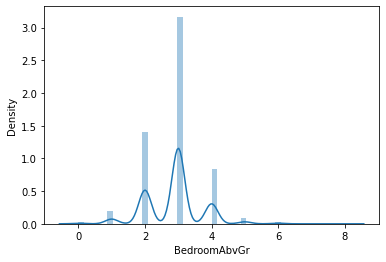

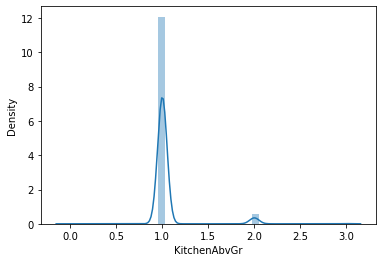

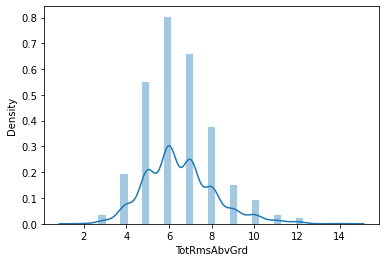

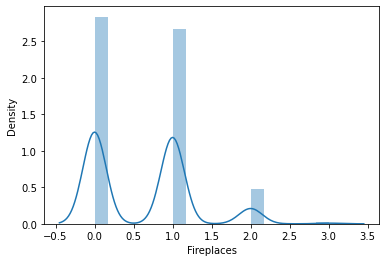

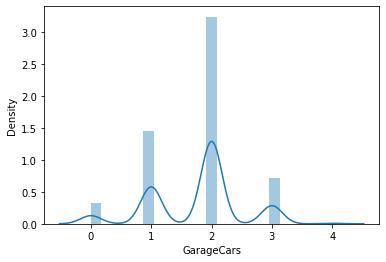

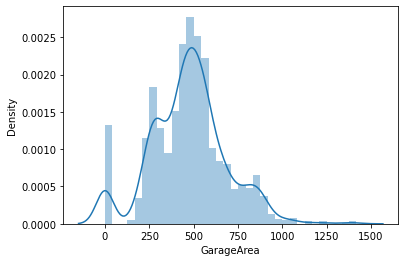

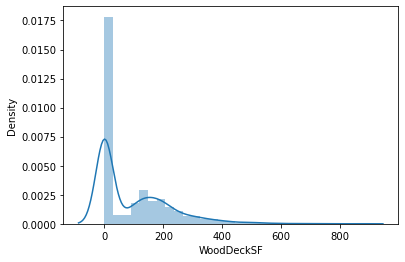

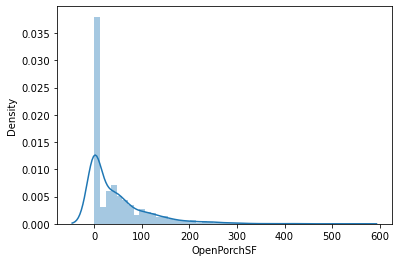

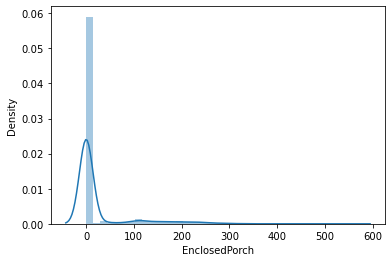

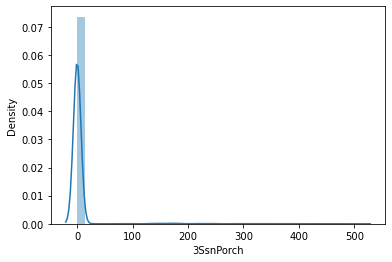

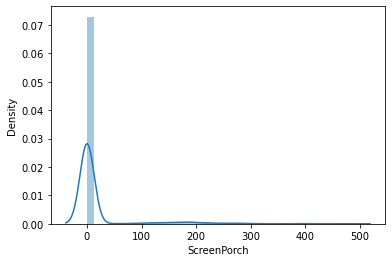

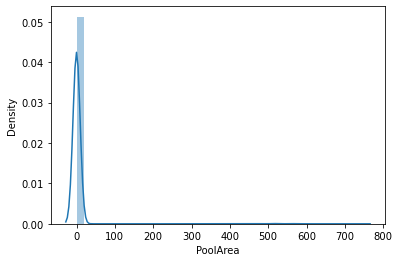

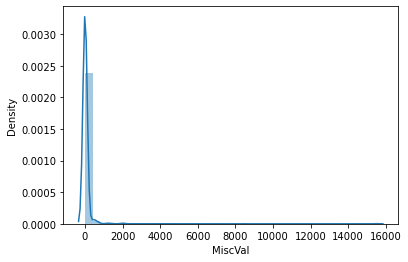

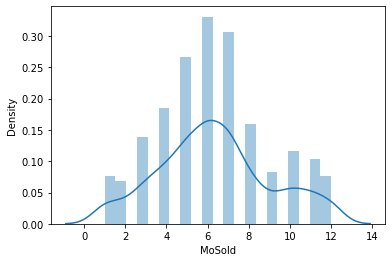

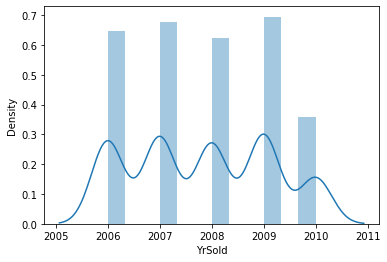

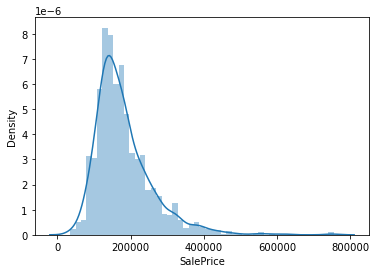

In [11]:
for col in df.select_dtypes('int64'):
    plt.figure()
    sns.distplot(df[col])

C:\Users\ranus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ranus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ranus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

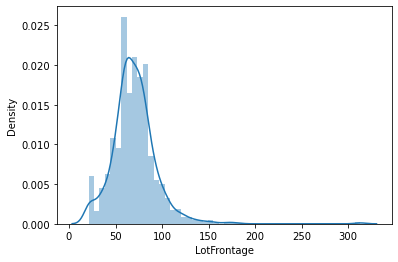

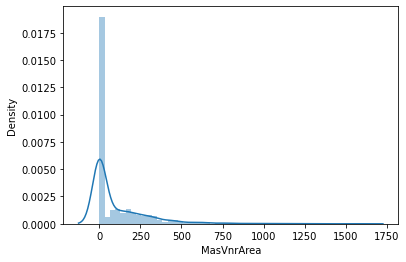

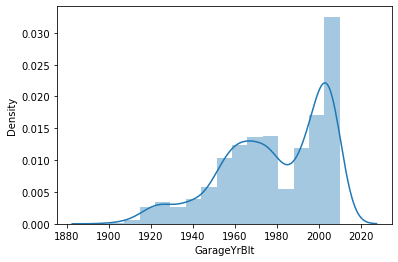

In [12]:
for col in df.select_dtypes("float64"):
    plt.figure()
    sns.distplot(df[col])

On remarque que les variables suivent des lois de probabilités on distinguent notamment des lois gaussienne, gamma, uniforme, exponentielle et une loi arcsinus.
On peut également noté la présence de pique sur la valeur 0 sur certains histogramme.


### Variable Qualitatives

Affichons les différentes valeurs des variables

In [18]:
for col in df.select_dtypes('object'):
    print(f'{col :-<20} {df[col].unique()}')

MSZoning------------ ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street-------------- ['Pave' 'Grvl']
LotShape------------ ['Reg' 'IR1' 'IR2' 'IR3']
LandContour--------- ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities----------- ['AllPub' 'NoSeWa']
LotConfig----------- ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope----------- ['Gtl' 'Mod' 'Sev']
Neighborhood-------- ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1---------- ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2---------- ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType------------ ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle---------- ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle----------- ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
Roof

C:\Users\ranus\AppData\Local\Temp\ipykernel_14692\2413286044.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


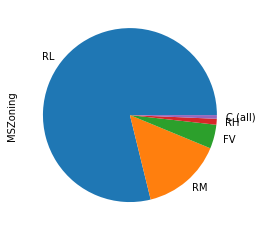

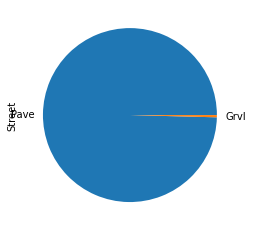

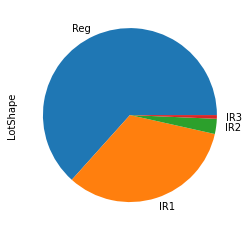

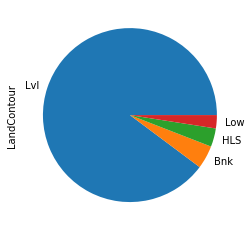

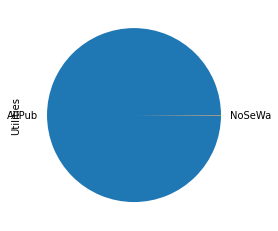

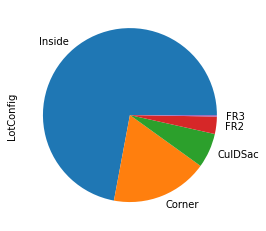

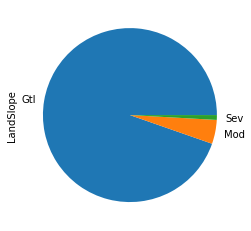

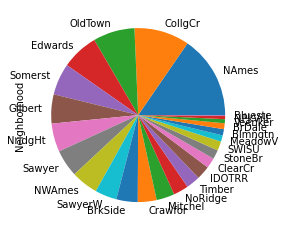

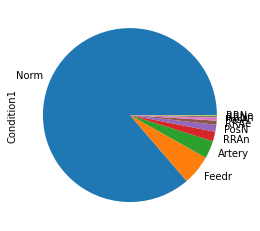

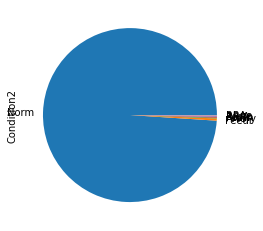

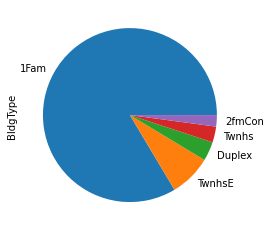

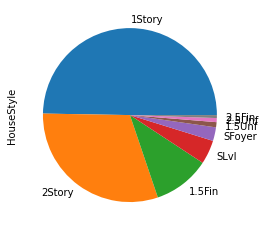

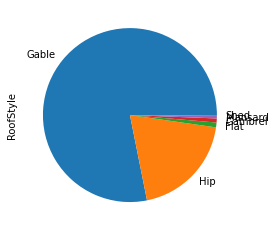

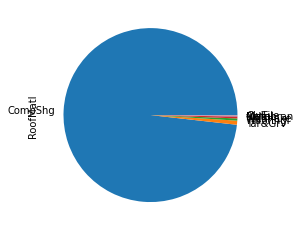

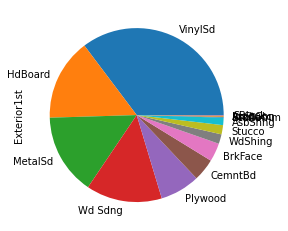

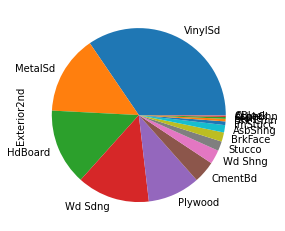

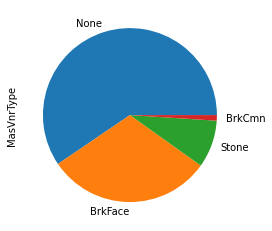

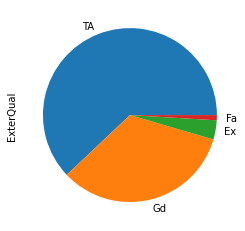

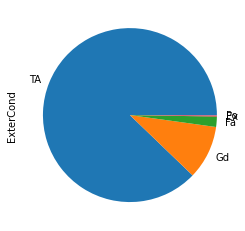

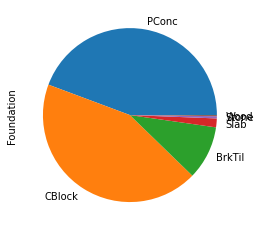

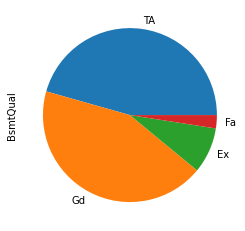

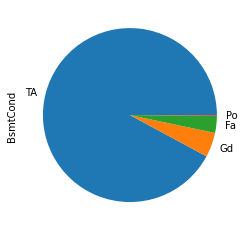

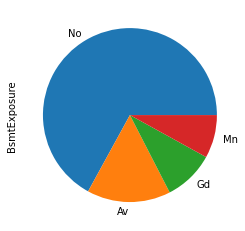

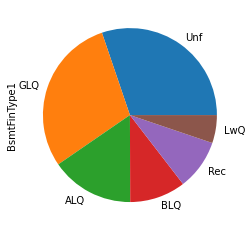

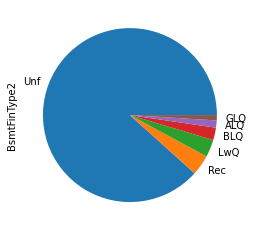

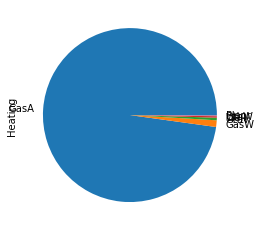

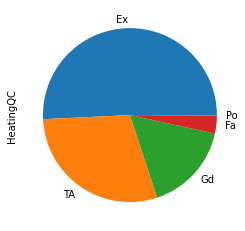

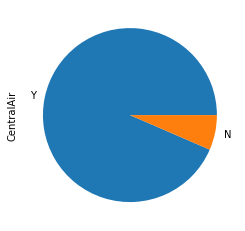

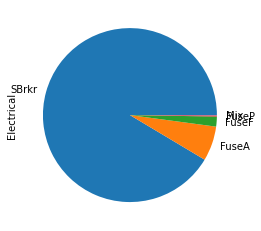

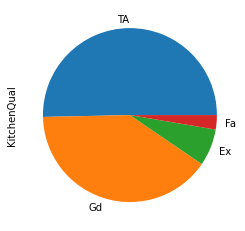

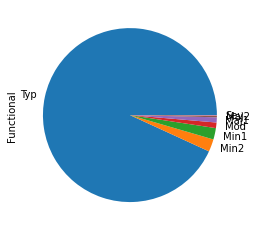

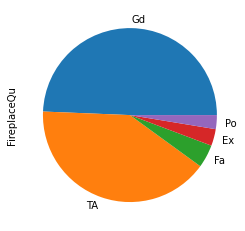

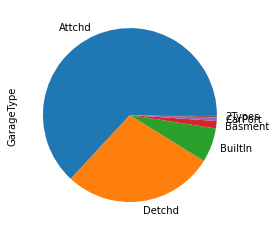

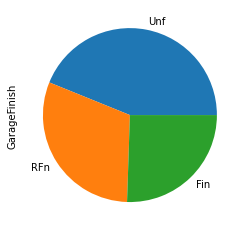

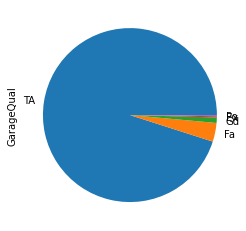

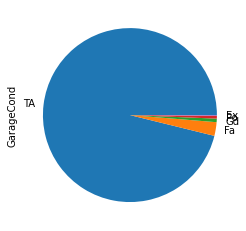

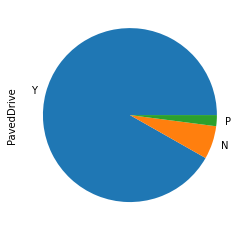

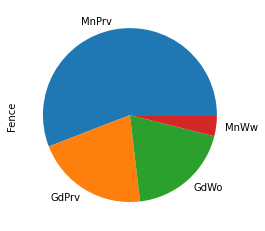

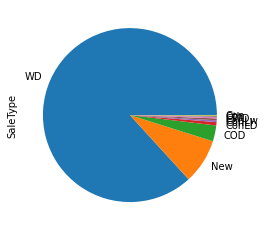

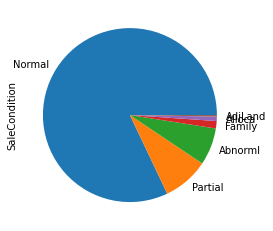

In [22]:
for col in df.select_dtypes('object'):
    plt.figure()
    df[col].value_counts().plot.pie()

Après affichage des valeurs des variables et de leurs répartition, on remarques que la grande majorité des variables sont non binaire.

In [8]:
######### Classe qui va remplacer les valeurs manquantes
#class Traitement: 

#   def __init__(self, data):
       #self.data=data
        #self.data_num=data.select_dtypes(exclude=["object"])
        #self.data_cat=data.select_dtypes(exclude['int64','float64'])

def traitement_na(data):
    category_features=[""]
    for cols in data.columns:
        if data[cols].dtype=="object":
            category_features.append(cols)
            data[cols]=data[cols].astype('category').cat.codes
            if data[cols].isnull().sum()!=0:
                data[cols]=data[cols].fillna(data[cols].mode(),inplace=True)
        if data[cols].dtype=="int64" or data[cols].dtype=="float64":
            if data[cols].isnull().sum()!=0:
                data[cols]=data[cols].fillna(data[cols].mean(),inplace=True)
    clean_data=data
    return clean_data
    
def separation(data):
    data_num=data.select_dtypes(exclude=["object"])
    data_cat=data.select_dtypes(exclude=['int64','float64'])
    return data_num, data_cat


house_data=traitement_na(house_data)

house_data=house_data.drop('SalePrice',axis=1)

data_train, data_test, target_train, target_test = train_test_split(house_data, target, train_size=0.8, random_state=0)
#data_num , data_cat= separation(house_data)


In [9]:
#eliminons les variables avec une faible variance


In [10]:
target='SalePrice'
corr_data=house_data.corr()
corr_data[target]


KeyError: 'SalePrice'

Modelisons une première fois avec un arbre decisionnel pour facilité la compréhension des différents problèmes qu'on pourrait rencontrer et nous allons l'évaluer. 
On fixe le random_state=0 afin d'avoir une certaine redondance ce qui aidera à la comprehension des hyper parametre.

In [ ]:
model_tree=DecisionTreeClassifier(random_state=0)

def evaluation(model):
    model.fit(house_data,target)
    target_pred=model.predict(house_data)
    print(confusion_matrix(target_test,target_pred))
    print(classification_report(target_test,target_pred))
    
    N, train_score, val_score=learning_curve(model, X_train, target_train,cv=4,train_sizes=np.linspace(0.1,1,10),scoring='f1')
    plt.figure(figsize=(12,8))
    plt.plot(N,train_score.mean(axis=1),label='train score')
    plt.plot(N,validation_score.mean(axis=1),label='validation_score')
evaluation(model_tree)

In [ ]:
pd.DataFrame(model.features_importances_, index=Xtrain.columns).plot.bar()  

In [ ]:
#data_train.isnull().sum() #compte les valeurs manquante
#sns.heatmap(data_train.isnull())

In [ ]:
#data_train['Alley'].hist()

In [ ]:
#data_train.plot(x='YearRemodAdd',y='SalePrice',kind='scatter',alpha=0.1,s=data_train['LowQualFinSF']/5,c="SalePrice",cmap=plt.get_cmap("jet"))
#plot avec tranparence à 0.1, size par rapport à lowqualfi diviser par 5, et colorer par rapport a saleprice avec la coulet jet issu de pyplot

In [ ]:
#data_cor=data_train.corr()
#target=data_cor['SalePrice']
#cor_var=['OverallQual','TotalBsmtSF','1stFlrSF','GarageCars','FullBath','GarageArea']
#data_cor_train=data_train[cor_var]
#data_cor_test=data_test[cor_var]

In [ ]:
#data_cor_train.isnull().sum()
#data_cor_train.hist()

In [ ]:
#data_cor_train=pd.concat([data_cor_train,data_train['SalePrice']],axis=1)

In [ ]:
#data_cor_train

In [ ]:
#house_data.isna().sum()

In [ ]:
#from sklearn.linear_model import LinearRegression
#from sklearn.model_selection import cross_validate
#from sklearn.pipeline import make_pipeline
#from sklearn.preprocessing import StandardScaler
#linear=make_pipeline(StandardScaler(),LinearRegression())


In [ ]:
#-------------------fill na values---------------------------
#for features in house_data.columns:
 #   if house_data[features].dtype=='object':
  #      house_data[features]=house_data[features].astype('category').cat.codes
   #     if house_data[features].isna().sum()!=0:
    #        house_data[features].fillna(house_data[features].mode(),inplace=True)
    #else:
     #   if house_data[features].isna().sum()!=0:
      #      house_data[features].fillna(house_data[features].mean(),inplace=True)
            


#---------------------------------------------------------------------
#house_data